<a href="https://colab.research.google.com/github/justinjunge/Convergent-Wisdom-Project/blob/main/Sample_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the Convergent Wisdom project! This module presents a sample sentiment analysis of a 92-sentence story about world unity generated by artificial intelligence, located in the samplesentimentanalysis.csv file in the Github repository.

These methods are applied to the study of the Bhagavad Gita (Hinduism), Qur'an (Islam), and Bible (Christianity) in a separate module.

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_csv_url_Gita = 'https://raw.githubusercontent.com/justinjunge/Convergent-Wisdom-Project/master/samplesentimentanalysis.csv'
response1 = requests.get(github_csv_url_Gita)
if response1.status_code == 200:
  df = pd.read_csv(StringIO(response1.text))
else:
  print('Failed to fetch CSV File from Github')

print(df)

    Number                                               Text
0        1  In a not-so-distant future, the world was on t...
1        2  The planet had seen its fair share of conflict...
2        3  The idea of global unity had taken root in the...
3        4  The story begins in a small village nestled in...
4        5  A young girl named Aria lived there, surrounde...
..     ...                                                ...
87      88  The world became a tapestry of diverse culture...
88      89  Despite the challenges that remained, the worl...
89      90  The vision of the ancient prophecy had become ...
90      91  People looked to the future with hope and dete...
91      92  The global symphony of unity continued to play...

[92 rows x 2 columns]


Now that we have our file, we can run a sample sentiment analysis.

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
df['Positive'] = ''
df['Neutral'] = ''
df['Negative'] = ''

# Create a SentimentIntensityAnalyzer object.
sentiment_analyzer = SentimentIntensityAnalyzer()

for index, row in df.iterrows():
    text = row['Text']
    sentiment_dict = sentiment_analyzer.polarity_scores(text)

    df.at[index,'Positive'] = sentiment_dict['pos']*100
    df.at[index,'Neutral'] = sentiment_dict['neu']*100
    df.at[index,'Negative'] = sentiment_dict['neg']*100

df

,Number,Text,Positive,Neutral,Negative
0,1,"In a not-so-distant future, the world was on t...",24.0,76.0,0.0
1,2,The planet had seen its fair share of conflict...,35.9,58.6,5.5
2,3,The idea of global unity had taken root in the...,18.5,81.5,0.0
3,4,The story begins in a small village nestled in...,0.0,100.0,0.0
4,5,"A young girl named Aria lived there, surrounde...",37.5,62.5,0.0
...,...,...,...,...,...
87,88,The world became a tapestry of diverse culture...,13.8,86.2,0.0
88,89,"Despite the challenges that remained, the worl...",0.0,92.9,7.1
89,90,The vision of the ancient prophecy had become ...,10.5,89.5,0.0
90,91,People looked to the future with hope and dete...,25.3,63.3,11.3


Above, we see how SentimentIntensityAnalyzer creates a filterable table where each line of the story has been assessed for its positive, engative, and neutral sentiment. We can run statistics and plot figures on these data. The following two lines of code, for example, calculate the average positivity of the story and plot the line-by-line change in positivity throughout the story.

In [ ]:
import numpy as np
np.mean(df.Positive)

16.790217391304342

Text(0.5, 1.0, 'Change in Positivity throughout the Story')

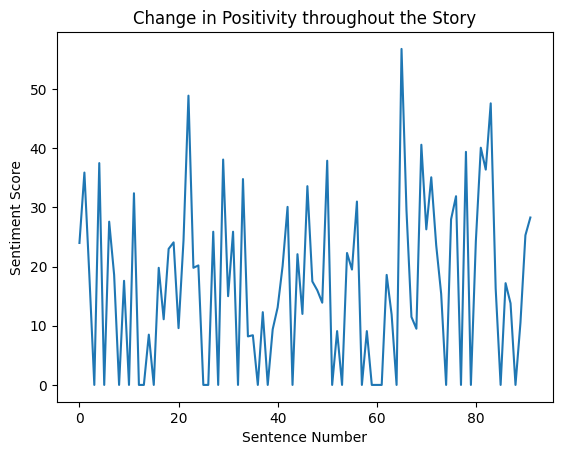

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.Positive)
plt.xlabel("Sentence Number")
plt.ylabel("Sentiment Score")
plt.title("Change in Positivity throughout the Story")

This code below locates the most negative sentence in the story.

In [ ]:
df[df.Negative == df['Negative'].max()]

,Number,Text,Positive,Neutral,Negative
15,16,"Riots and protests erupted in some places, thr...",0.0,61.9,38.1


This code below creates s scatterplot of neutrality in the story.

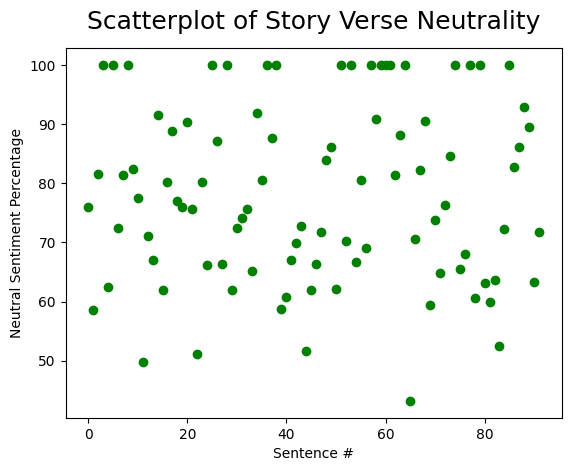

In [ ]:
plt.scatter(np.arange(df.shape[0]),df.loc[:,"Neutral"], c='green')
plt.xlabel('Sentence #')
plt.ylabel('Neutral Sentiment Percentage')
plt.title("Scatterplot of Story Verse Neutrality", fontsize = 18, y = 1.03)
plt.show()

As we can see, the SentimentIntensityAnalyzer is a quick way for our code to read through a text and determine sentence-by-sentence emotionality. We can then use Python libraries like pandas, numpy, and matplotlib to run fascinating data analyses. Now, just imagine if we extended this code to consider not a story generated by artificial intelligence but rather three of the most influential texts ever to comprise human religious thought. We could run line-by-line analyses, chapter-by-chapter comparisons, and even compare emotional sentiments across texts and their respective religions. The possibilities are simply endless, and many of these possibilities are explored in the upcoming modules.